# **Rodrigo_Mesquita_DR3_TP2**
## **Inteligência Artificial: Classificação [24E2_3]**

# 1.Carregue o dataset "Titanic" (a mesma do TP1) para um dataframe utilizando linguagem Python e execute as seguintes transformações, utilizando a biblioteca Pandas:


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, RocCurveDisplay
from sklearn import tree
from sklearn import metrics

In [3]:
df = pd.read_csv('/workspaces/Faculdade/Datasets/DR3_TP2_Titanic.csv')

### 1a.Elimine as variáveis “PassengerId”,”Name”,”Ticket” e “Cabin”;

In [4]:
df= df.drop(columns=['PassengerId','Name','Ticket','Cabin'])

### 1b.Elimine observações que contenham dados ausentes (NA);


In [5]:
lines = df.shape[0]
print(lines)
nulls = df.isnull().sum()
print(nulls)

891
Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64


In [6]:
df = df.dropna()

In [7]:
lines = df.shape[0]
print(lines)
nulls = df.isnull().sum()
print(nulls)

712
Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


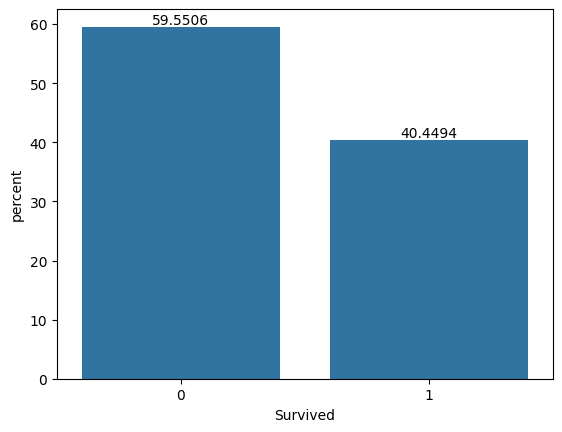

In [8]:
ax = sns.countplot(df, x='Survived', stat="percent")
ax.bar_label(ax.containers[0], fontsize=10);

### 1c.Aplique o LabelEncoder nas variáveis “Embarked” e “Sex”;


In [9]:
encoder = LabelEncoder()
df['Embarked'] = encoder.fit_transform(df['Embarked'])
df['Sex'] = encoder.fit_transform(df['Sex'])

### 1d.Separe o dataframe resultante em Treino-Teste, utilizando a proporção 70-30%.


In [10]:
X = df.drop(columns=['Survived'])
Y = df['Survived']

In [11]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state = 20)

### 1e.A partir do dataframe totalmente transformado, aplique um modelo SVM utilizando um Kernel linear.


In [38]:
#Treinando o modelo
clf = DecisionTreeClassifier()
clf = clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

# 2.Apresente as métricas acurácia, precision, recall e F1-score deste modelo.

In [40]:
# Precision, Recall, F1-Score e Acurácia
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.74      0.78       129
           1       0.66      0.76      0.71        85

    accuracy                           0.75       214
   macro avg       0.75      0.75      0.75       214
weighted avg       0.76      0.75      0.75       214



### 2a.Apresente também a matriz de confusão resultante do processo de treinamento.

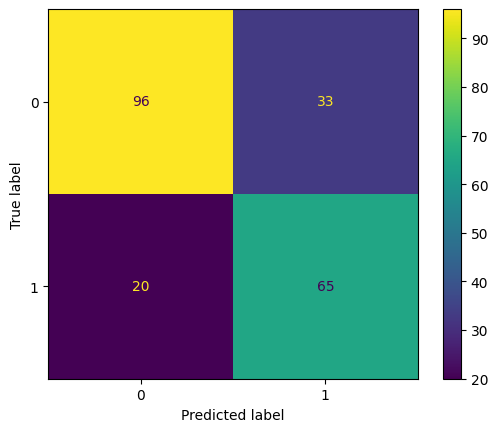

In [39]:
# Avaliando o resultado
cm = metrics.confusion_matrix(y_test, y_pred)

disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()

# 3.Execute o mesmo modelo, agora utilizando dois núcleos diferentes, o rbf e o sigmoid.

### 3a.Apresente as métricas acurácia, precision, recall e F1-score destes modelos.


### 3b.Apresente também a matriz de confusão resultante do processo de treinamento.


# 4.Compare as três execuções, apresente um resumo dos resultados relevantes e indique qual o melhor, a partir do experimento.